In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy as sp
import pandas as pd

# Quantization and sampling of a linear signal

In [80]:
# time
t = np.arange(0, 20)
# function(t)
f_t = 0.85 ** t

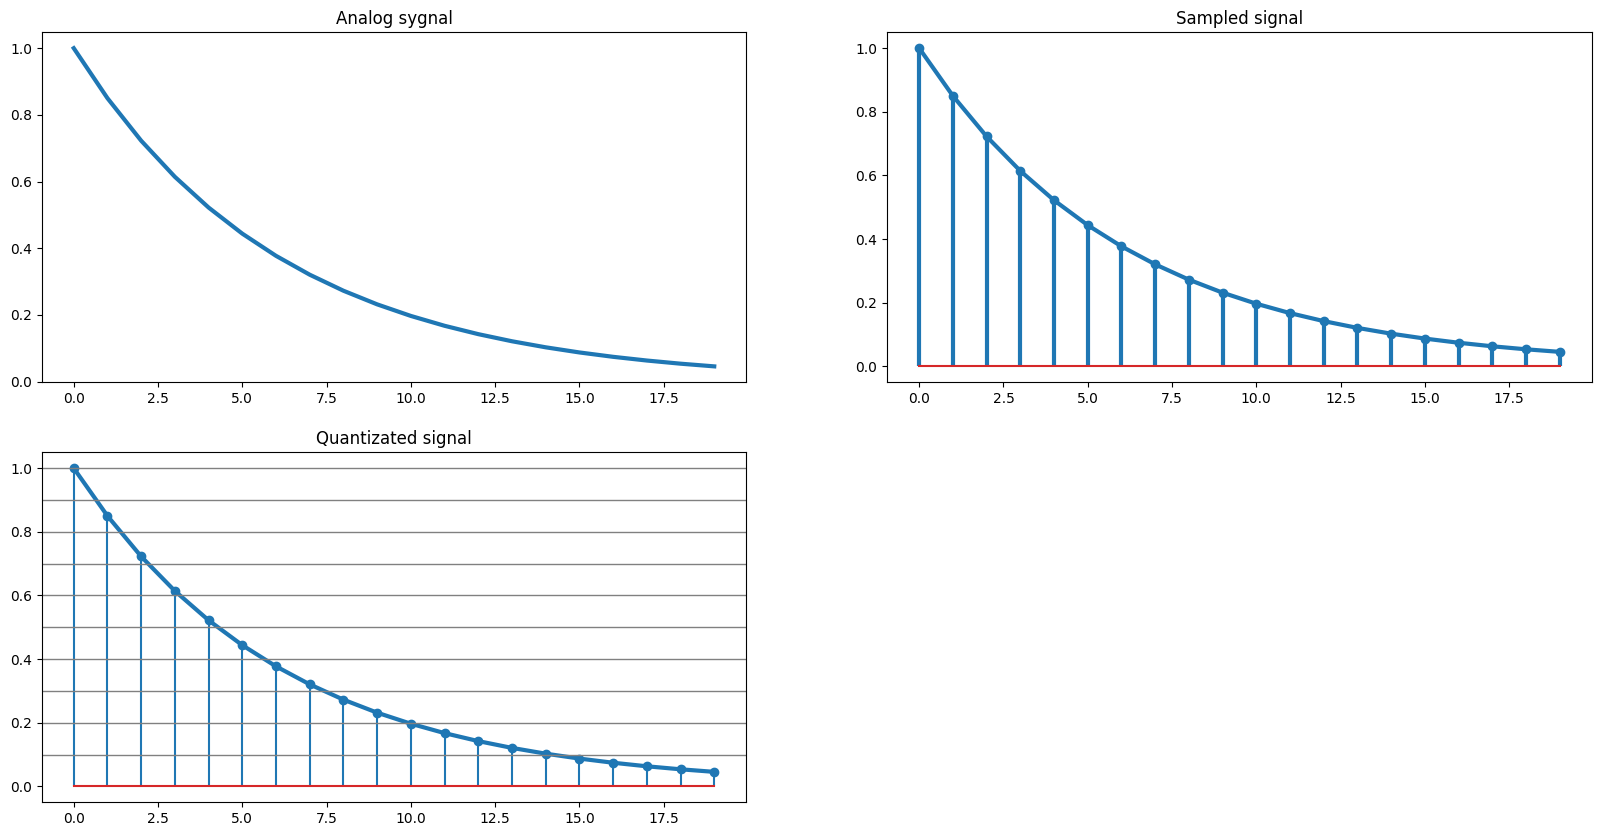

In [81]:
plt.figure(figsize =(20, 10))
plt.subplot(2,2,1)
plt.title('Analog sygnal')
plt.plot(t, f_t, linewidth=3, label = 'Signal = function(t)')

# Sampling

plt.subplot(2,2,2)
plt.title('Sampled signal')
plt.plot(t, f_t, linewidth=3)
markers_count = t
marker, sampling_lines, baseline = plt.stem(markers_count, f_t)
plt.setp(sampling_lines, linewidth = 3)

# Quantization
plt.subplot(2,2,3)
plt.title('Quantizated signal')
plt.plot(t, f_t, linewidth=3)
marker, sampling_lines, baseline = plt.stem(markers_count, f_t)

plt.axhline(y=1, xmin=0, xmax=10, color = 'gray', linewidth=1)
plt.axhline(y=0.9, xmin=0, xmax=10, color = 'gray', linewidth=1)
plt.axhline(y=0.8, xmin=0, xmax=10, color = 'gray', linewidth=1)
plt.axhline(y=0.7, xmin=0, xmax=10, color = 'gray', linewidth=1)
plt.axhline(y=0.6, xmin=0, xmax=10, color = 'gray', linewidth=1)
plt.axhline(y=0.5, xmin=0, xmax=10, color = 'gray', linewidth=1)
plt.axhline(y=0.4, xmin=0, xmax=10, color = 'gray', linewidth=1)
plt.axhline(y=0.3, xmin=0, xmax=10, color = 'gray', linewidth=1)
plt.axhline(y=0.2, xmin=0, xmax=10, color = 'gray', linewidth=1)
plt.axhline(y=0.1, xmin=0, xmax=10, color = 'gray', linewidth=1)


In [82]:
df = pd.DataFrame(f_t, t)
df

,0
0,1.000000
1,0.850000
2,0.722500
3,0.614125
4,0.522006
5,0.443705
6,0.377150
7,0.320577
8,0.272491
9,0.231617


# Operations with an audio signal

In [83]:
!wget 'https://download.samplelib.com/wav/sample-3s.wav'

--2022-10-12 20:35:40--  https://download.samplelib.com/wav/sample-3s.wav
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving download.samplelib.com (download.samplelib.com)... 2.56.91.35
Connecting to download.samplelib.com (download.samplelib.com)|2.56.91.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 563756 (551K) [audio/x-wav]
Saving to: ‘sample-3s.wav.1’

sample-3s.wav.1     100%[===================>] 550.54K   632KB/s    in 0.9s    

2022-10-12 20:35:43 (632 KB/s) - ‘sample-3s.wav.1’ saved [563756/563756]



In [84]:
sampling_rate, audio_data = sp.io.wavfile.read('sample-3s.wav')
audio_data

array([[-1934, -1934],
       [-1276, -1276],
       [ -241,  -241],
       ...,
       [  438,   438],
       [  593,   593],
       [   88,    88]], dtype=int16)

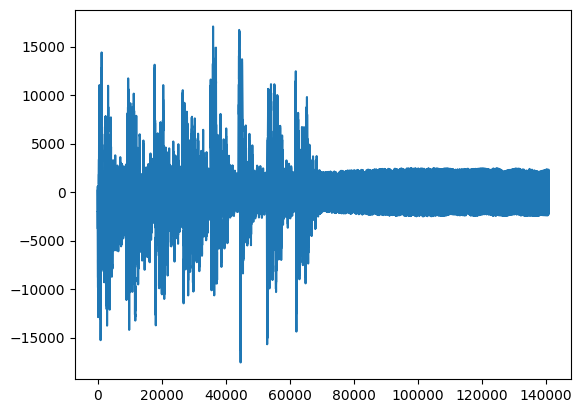

In [85]:
plt.plot(np.arange(len(audio_data)), audio_data[:,1])

In [86]:
from IPython.display import Audio
audio = Audio(data=audio_data[:,1], rate=sampling_rate)
print(f'Num of samples: {len(audio_data)}')
print(f'Timestep in ms: {1/ sampling_rate*1000}')
audio

Num of samples: 140928
Timestep in ms: 0.022675736961451247


# Signal normalization

In [87]:
def normalize(ys, amp=1.0):
    high, low = abs(max(ys)), abs(min(ys))
    return amp * ys / max(high, low)

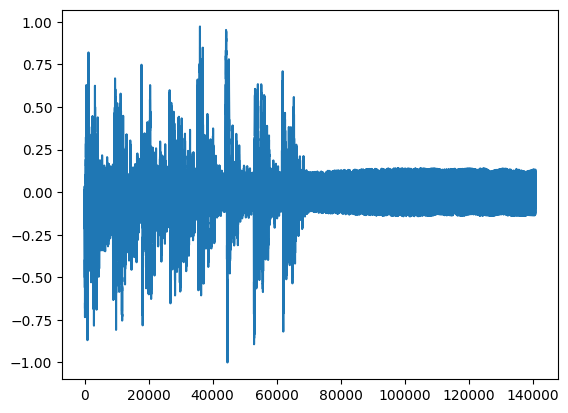

In [88]:
norm_audio = normalize(audio_data[:,1], amp=1.0)
plt.plot(np.arange(len(norm_audio)), norm_audio)

# Signal segmentation

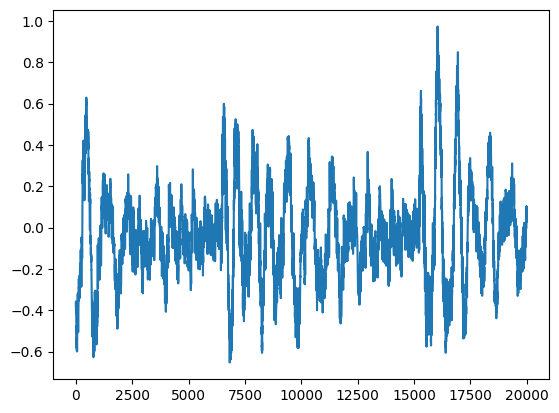

In [89]:
norm_audio_segment = norm_audio[20000:40000]
plt.plot(np.arange(len(norm_audio_segment)), norm_audio_segment)

### shift by X(t)

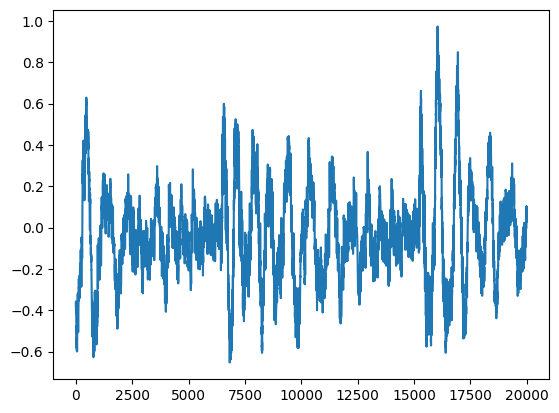

In [91]:
shift = 10
x_new = np.arange(len(norm_audio_segment))
x_new += shift
plt.plot(np.arange(len(x_new)), norm_audio_segment)